In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train,test],ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
sex = {
    "male" :0,
    "female" :1
}
df['Sex'] = df['Sex'].map(sex)

In [5]:
 df['Sex']

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

In [6]:
df =df.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis=1)

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,0,22.0,1,0,7.2500
1,1.0,1,1,38.0,1,0,71.2833
2,1.0,3,1,26.0,0,0,7.9250
3,1.0,1,1,35.0,1,0,53.1000
4,0.0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,NaN,3,0,NaN,0,0,8.0500
1305,NaN,1,1,39.0,0,0,108.9000
1306,NaN,3,0,38.5,0,0,7.2500
1307,NaN,3,0,NaN,0,0,8.0500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 71.7 KB


In [9]:
df.dropna(subset=['Survived','Age'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    float64
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 44.6 KB


<Axes: >

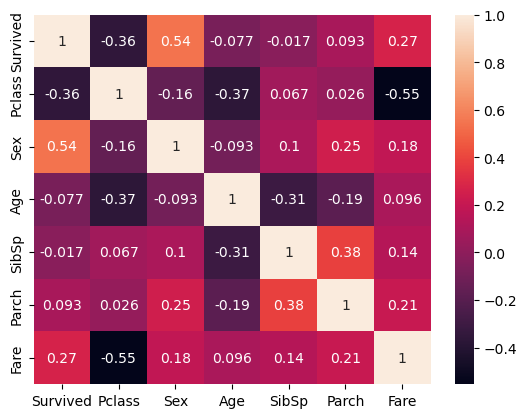

In [11]:
sns.heatmap(df.corr(),annot=True)

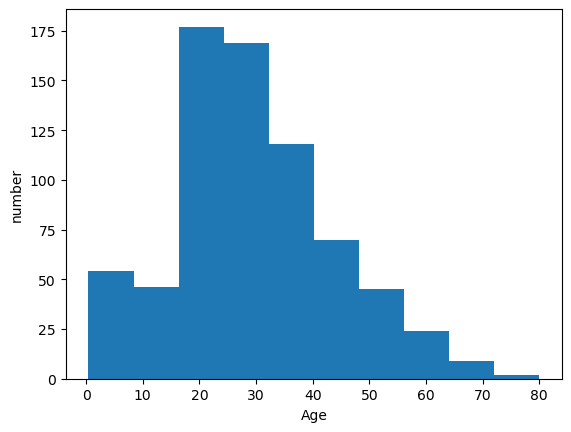

In [12]:
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("number")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [14]:
X = df.drop(['Survived'],axis=1)
y = df.Survived

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=116)

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
model.score(X_train,y_train)

0.809106830122592

In [18]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy =: ",accuracy*100,'%')

accuracy =:  81.81818181818183 %
